In [1]:
from deepdiff import DeepDiff

In [2]:
def get_last_uspcm_edge_numbers(max_n, path_prefix='data'):
    import os

    files_list = os.listdir(path_prefix + '/uspcm_dict')

    edges = max_n*(max_n - 1) // 2
    for filename in files_list:
        if f'_n_{max_n}' in filename:
            start_idx = filename.find('edges-') + len('edges-')
            try:
                stop_idx = filename.index('_backup.txt')
            except ValueError:
                stop_idx = filename.index('.txt')
            if int(filename[start_idx:stop_idx]) < edges:
                edges = int(filename[start_idx:stop_idx])

    return edges


def check_uspcm_dict_diffs(num_verts, num_edges, full_uspcm_v2):
    
    uspcm_v5 = {}
    uspcm_v5[f'{num_verts}_verts'] = {}
    v5_path = '../v5_folder/v5_data/uspcm_dict'
    filename = f'uspcm_dict_{num_verts}_verts_{num_edges}_edges.txt'
    with open(os.path.join(v5_path, filename), 'r') as infile:
        uspcm_v5[f'{num_verts}_verts'][f'{num_edges}_edges'] = eval(infile.read())
        
    uspcm_v6 = {}
    uspcm_v6[f'{num_verts}_verts'] = {}
    v6_path = 'data/uspcm_dict'
    filename = f'uspcm_dict_{num_verts}_verts_{num_edges}_edges.txt'
    with open(os.path.join(v6_path, filename), 'r') as infile:
        uspcm_v6[f'{num_verts}_verts'][f'{num_edges}_edges'] = eval(infile.read())
    
    
    count_lower = 0
    count_higher = 0
    count_equal=0
    count_connected = 0
    # num_of_graphs = len(uspcm_v5[f'{num_verts}_verts'][f'{num_edges}_edges'])

    for graph_key in uspcm_v6[f'{num_verts}_verts'][f'{num_edges}_edges'].keys():
        if Graph(graph_key).is_connected():
            count_connected +=1

            v6_spec_num = uspcm_v6[f'{num_verts}_verts'][f'{num_edges}_edges'][graph_key]
            v5_spec_num = uspcm_v5[f'{num_verts}_verts'][f'{num_edges}_edges'][graph_key]
            if v2_spec_num < v5_spec_num:
    #             print(f'{graph_key},\t\t{v2_spec_num}\t<\t{v5_spec_num}')
                count_lower += 1 
            elif v6_spec_num > v5_spec_num:
    #             print(f'{graph_key},\t\t{v2_spec_num}\t<\t{v5_spec_num}')
                count_higher += 1
            elif v6_spec_num == v5_spec_num:
                count_equal += 1
    
    if count_equal != count_connected:
        print(f'Number of continuous graphs on {num_verts} vertices and {num_edges} edges: {count_connected}')
        print(f'Number of v6_spec_num < v5_spec_num: {count_lower},\tNumber of v6_spec_num > v5_spec_num: {count_higher},\tNumber of v6_spec_num == v5_spec_num: {count_equal}')
        
    t1, t2 = uspcm_v6[f'{num_verts}_verts'][f'{num_edges}_edges'], uspcm_v5[f'{num_verts}_verts'][f'{num_edges}_edges']

    return DeepDiff(t1, t2, ignore_order=True)

In [3]:
load('spectator_floor_number_read_write_functions.py')

In [4]:
def check_uspcm_diffs():
    path_prefix = 'v5_data'
    max_n, edcount = get_last_uspcm_dict_numbers(path_prefix)
    v2_path = '../working_folder/data'
#     v2_edcount = get_last_uspcm_edge_numbers(max_n, v2_path)
    v2_edcount =18
    
    v2_full_path = '../working_folder/data/uspcm_dict'
    filename = f'full_uspcm_dict_after_n_10_edges-18.txt'
    with open(os.path.join(v2_full_path, filename), 'r') as infile:
        full_uspcm_v2 = eval(infile.read())
    
    diffs_list = []

    for n_verts in range(2, max_n):
        for m_edges in range(n_verts*(n_verts-1)//2, n_verts-2, -1):
            print(n_verts, m_edges)
            diffs = check_uspcm_dict_diffs(n_verts, m_edges, full_uspcm_v2)
            if len(diffs) != 0:
                diffs_list.append(diffs)

    for m_edges in range(max_n*(max_n-1)//2, v2_edcount-1, -1):
        print(max_n, m_edges)
        diffs = check_uspcm_dict_diffs(max_n, m_edges, full_uspcm_v2)
        if len(diffs) != 0:
            diffs_list.append(diffs)
    
    if len(diffs_list) == 0:
        return 'No Differences!!!'
    else:
        return diffs_list

In [15]:
check_uspcm_diffs()

2 1
3 3
3 2
4 6
4 5
4 4
4 3
5 10
5 9
5 8
5 7
5 6
5 5
5 4
6 15
6 14
6 13
6 12
6 11
6 10
6 9
6 8
6 7
6 6
6 5
7 21
7 20
7 19
7 18
7 17
7 16
7 15
7 14
7 13
7 12
7 11
7 10
7 9
7 8
7 7
7 6
8 28
8 27
8 26
8 25
8 24
8 23
8 22
8 21
8 20
8 19
8 18
8 17
8 16
8 15
8 14
8 13
8 12
8 11
8 10
8 9
8 8
8 7
9 36
9 35
9 34
9 33
9 32
9 31
9 30
9 29
9 28
9 27
9 26
9 25
9 24
9 23
9 22
9 21
9 20
9 19
9 18
9 17
9 16
9 15
9 14
9 13
9 12
9 11
9 10
9 9
9 8
10 45
10 44
10 43
10 42
10 41
10 40
10 39
10 38
10 37
10 36
10 35
10 34
10 33
10 32
10 31
10 30
10 29
10 28
10 27
10 26
10 25
10 24
10 23
10 22
10 21
10 20
10 19
10 18


[{'dictionary_item_added': [root['I]Xkcc~ro'], root['I^|CKKvRw'], root['IJm}EFBNw'], root['Iz]CKK~Vo'], root['IlXkcc~ro'], root['IlrH`c~ro'], root['I}XkccnFw'], root['I~N?W^FMw'], root['IxUW~BbFw']]},
 {'dictionary_item_added': [root['IJ]DlnKrG'], root['IJ]KlNF}?']]}]

In [5]:
uspcm_diff_list = [{'dictionary_item_added': ['I]Xkcc~ro', 'I^|CKKvRw', 'IJm}EFBNw', 'Iz]CKK~Vo', 'IlXkcc~ro', 'IlrH`c~ro', 'I}XkccnFw', 'I~N?W^FMw', 'IxUW~BbFw']},
 {'dictionary_item_added': ['IJ]DlnKrG', 'IJ]KlNF}?']}]
uspcm_diff_list

[{'dictionary_item_added': ['I]Xkcc~ro',
   'I^|CKKvRw',
   'IJm}EFBNw',
   'Iz]CKK~Vo',
   'IlXkcc~ro',
   'IlrH`c~ro',
   'I}XkccnFw',
   'I~N?W^FMw',
   'IxUW~BbFw']},
 {'dictionary_item_added': ['IJ]DlnKrG', 'IJ]KlNF}?']}]

In [6]:
v2_full_path = '../working_folder/data/uspcm_dict'
filename = f'full_uspcm_dict_after_n_10_edges-18.txt'
with open(os.path.join(v2_full_path, filename), 'r') as infile:
    full_uspcm_v2 = eval(infile.read())

In [33]:
uspcm_v5 = {}
uspcm_v5[f'10_verts'] = {}

uspcm_v5['10_verts']['26_edges'] = read_partial_uspcm_dict(num_verts=10, num_edges=26, path_prefix='v5_data')
uspcm_v5['10_verts']['25_edges'] = read_partial_uspcm_dict(num_verts=10, num_edges=25, path_prefix='v5_data')
uspcm_v5['10_verts']['24_edges'] = read_partial_uspcm_dict(num_verts=10, num_edges=24, path_prefix='v5_data')
uspcm_v5['10_verts']['23_edges'] = read_partial_uspcm_dict(num_verts=10, num_edges=23, path_prefix='v5_data')

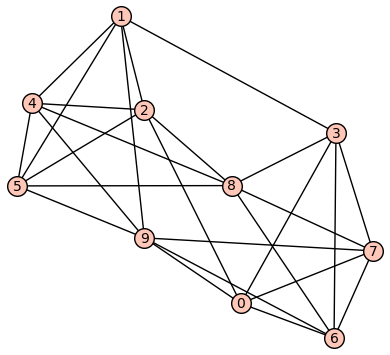

10 26 is connected = True
Graph in uspcm_v2?: False
Graph in uspcm_v5?: True
Spectator minor floor: 8


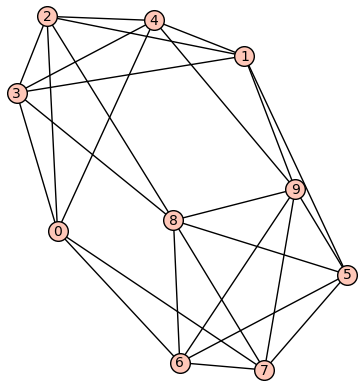

10 26 is connected = True
Graph in uspcm_v2?: False
Graph in uspcm_v5?: True
Spectator minor floor: 8


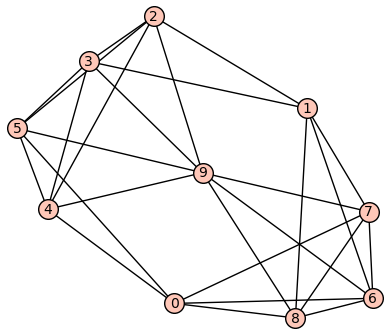

10 26 is connected = True
Graph in uspcm_v2?: False
Graph in uspcm_v5?: True
Spectator minor floor: 8


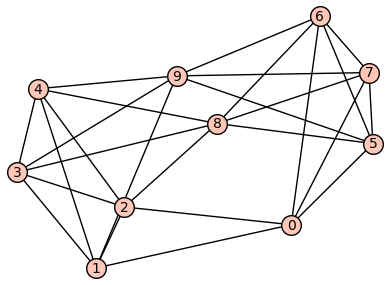

10 26 is connected = True
Graph in uspcm_v2?: False
Graph in uspcm_v5?: True
Spectator minor floor: 8


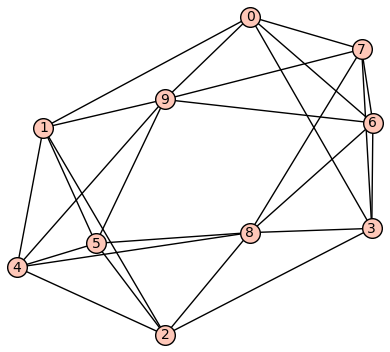

10 26 is connected = True
Graph in uspcm_v2?: False
Graph in uspcm_v5?: True
Spectator minor floor: 8


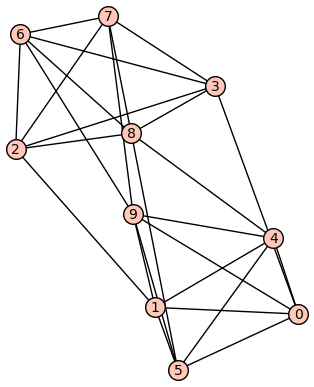

10 26 is connected = True
Graph in uspcm_v2?: False
Graph in uspcm_v5?: True
Spectator minor floor: 8


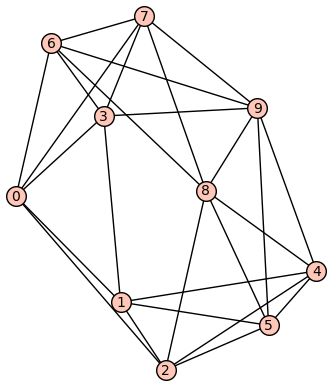

10 26 is connected = True
Graph in uspcm_v2?: False
Graph in uspcm_v5?: True
Spectator minor floor: 8


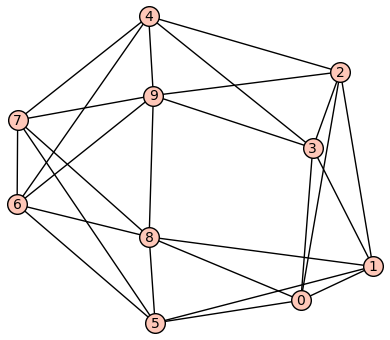

10 26 is connected = True
Graph in uspcm_v2?: False
Graph in uspcm_v5?: True
Spectator minor floor: 8


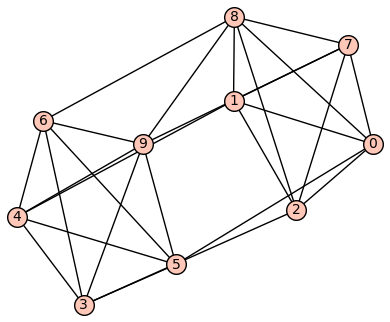

10 26 is connected = True
Graph in uspcm_v2?: False
Graph in uspcm_v5?: True
Spectator minor floor: 8


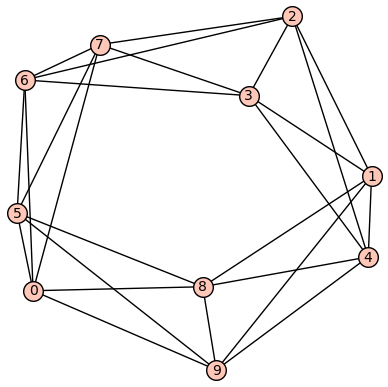

10 25 is connected = True
Graph in uspcm_v2?: False
Graph in uspcm_v5?: True
Spectator minor floor: 8


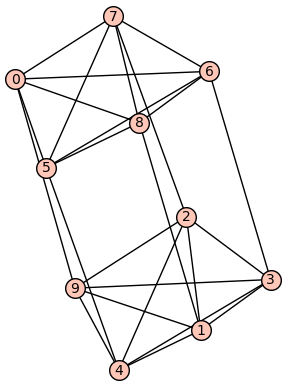

10 25 is connected = True
Graph in uspcm_v2?: False
Graph in uspcm_v5?: True
Spectator minor floor: 8


In [8]:
for tmp_dict in uspcm_diff_list:
    for key, val_list in tmp_dict.items():
        for g6_str in val_list:
            G = Graph(g6_str)
            G.show()
            num_verts = G.num_verts()
            num_edges = G.num_edges()
            print(num_verts, num_edges, f'is connected = {G.is_connected()}')
            
#             spec_floor_v2 = full_uspcm_v2[f'{num_verts}_verts'][f'{num_edges}_edges'][g6_str]
#             spec_floor_v5 = uspcm_v5[f'{num_verts}_verts'][f'{num_edges}_edges'][g6_str]
#             print(f'From uspcm_v2: {spec_floor_v2},\tFrom uspcm_v5: {spec_floor_v5},')
            print('Graph in uspcm_v2?:', g6_str in full_uspcm_v2[f'{num_verts}_verts'][f'{num_edges}_edges'])
            print('Graph in uspcm_v5?:', g6_str in uspcm_v5[f'{num_verts}_verts'][f'{num_edges}_edges'])
            print('Spectator minor floor:', uspcm_v5[f'{num_verts}_verts'][f'{num_edges}_edges'][g6_str])

In [28]:
'I]Xkcc~ro' in full_uspcm_v2['10_verts']['26_edges'].keys()

False

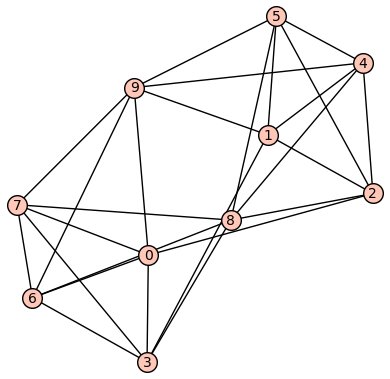

10 26 is connected = True


In [24]:
G = Graph('I]Xkcc~ro')
G.show()
print(G.num_verts(), G.num_edges(), f'is connected = {G.is_connected()}')

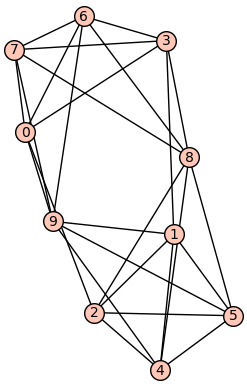

10 26 is connected = True


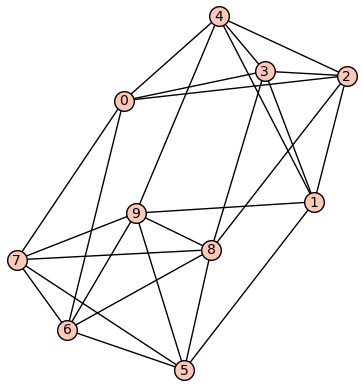

10 26 is connected = True


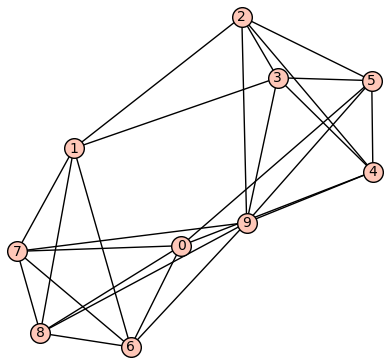

10 26 is connected = True


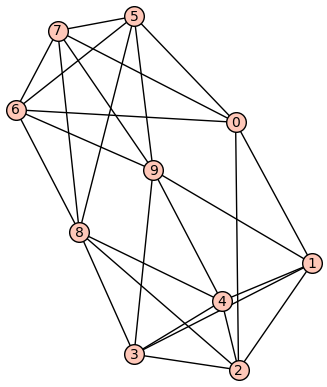

10 26 is connected = True


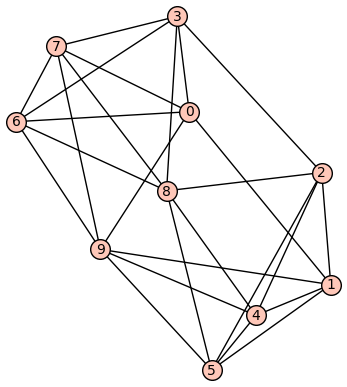

10 26 is connected = True


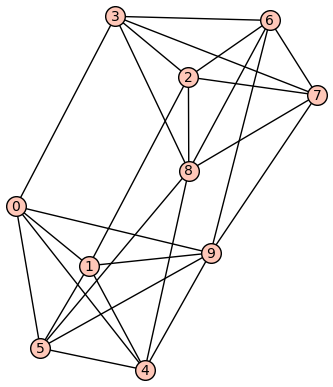

10 26 is connected = True


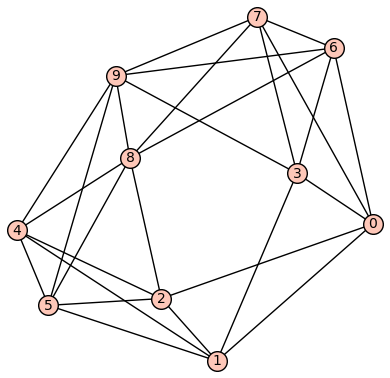

10 26 is connected = True


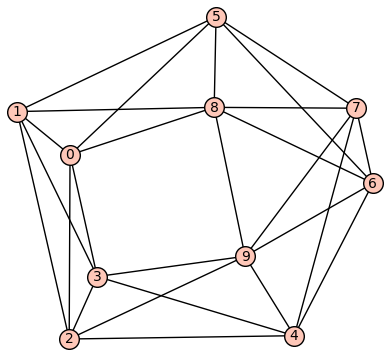

10 26 is connected = True


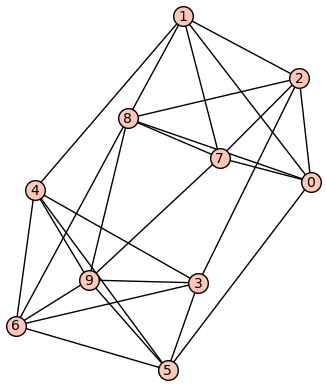

10 26 is connected = True


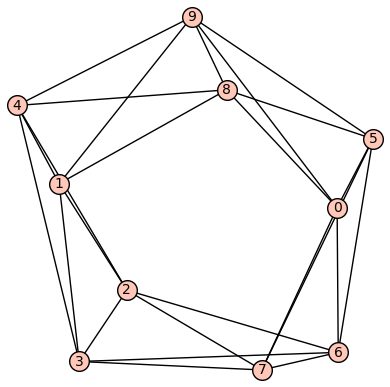

10 25 is connected = True


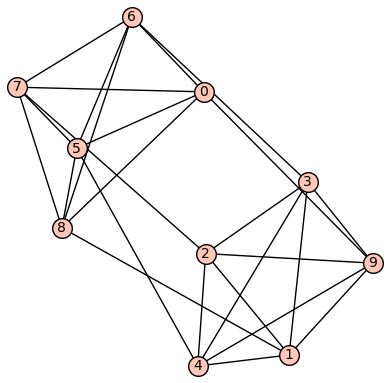

10 25 is connected = True


In [28]:
for tmp_dict in uspcm_diff_list:
    for key, val_list in tmp_dict.items():
        for g6_str in val_list:
            G = Graph(g6_str)
            G.show()
            print(G.num_verts(), G.num_edges(), f'is connected = {G.is_connected()}')

In [10]:
import os

os.getcwd()

'/home/cerickson30/Projects/MRC_Haystacks/qBound/folder_v5'

In [16]:
os.listdir('v5_data/minimals_dict')[0]

'minimals_dict_8_verts_7_edges-backup.txt'

In [9]:
v5_path = 'v5_data/minimals_dict'
v5_file_9_1 = 'minimals_dict_9_verts_1_edges.txt'

with open(os.path.join(v5_path, v5_file_9_1)) as infile:
    v5_minimals_dict_9_1 = eval(infile.read())
    
v5_file_10_1 = 'minimals_dict_10_verts_1_edges.txt'

with open(os.path.join(v5_path, v5_file_10_1)) as infile:
    v5_minimals_dict_10_1 = eval(infile.read())

In [10]:
v5_minimals_dict_9_1

{'0_spectators': {'@'},
 '1_spectators': {'Bw', 'CF'},
 '2_spectators': {'C]', 'D?{', 'E@UW', 'F@Q?w'},
 '3_spectators': {'DFw',
  'E?Bw',
  'E@JW',
  'EIe_',
  'F?CmW',
  'F?_yo',
  'G?CaC[',
  'G?Ce?[',
  'H@Q?_SF'},
 '4_spectators': {'E?~o',
  'EFz_',
  'ELrw',
  'ELv_',
  'F??Fw',
  'F??^o',
  'F?KuW',
  'F@O^G',
  'FK?}O',
  'FK_yo',
  'F_YPw',
  'Fo?yo',
  'G??@}W',
  'G??GnK',
  'G??HmK',
  'G??SZW',
  'G??XUK',
  'G??yso',
  'G?CiSK',
  'G@GGeK',
  'G@GQSK',
  'G@HCG{',
  'GICcSG',
  'GK_a?{',
  'H??@qiK',
  'H??G_N`',
  'H??G`BF',
  'H??GbAF',
  'H??He?F',
  'H?@C@o]',
  'H?CaC?N',
  'H@HC?oF'},
 '5_spectators': {'F?B~o',
  'F?~v_',
  'FDp~o',
  'F_]vw',
  'F_|tg',
  'FbY|o',
  'FsLZW',
  'G???F{',
  'G???^w',
  'G??WvK',
  'G??ZNo',
  'G??xuK',
  'G??}V_',
  'G?C_^c',
  'G?LLeK',
  'G?LRC[',
  'G?MQNS',
  'G?TclO',
  'G?TktK',
  'G?U\\Bc',
  'G?Xcko',
  'G?]?nK',
  'G?]e?k',
  'G?eRbW',
  'G@Ce]W',
  'G@HIc{',
  'G@Q?~?',
  'G@USRK',
  'GAcu@[',
  'GAeR@[',
  'GC?^B[',
  'GG?

In [11]:
v5_minimals_dict_10_1

{'0_spectators': {'@'},
 '1_spectators': set(),
 '2_spectators': set(),
 '3_spectators': {'I??@aQCF?'},
 '4_spectators': {'I?Ca?GBaW', 'I?Ce?CH@W', 'I?Q@?oS?w'},
 '5_spectators': {'I????ser?',
  'I???GOB{G',
  'I???GOOww',
  'I???GOoow',
  'I???GOrr?',
  'I???GPo_w',
  'I???GoBwG',
  'I???Gp__w',
  'I???GqDY_',
  'I???Xb??w',
  'I???XeSR?',
  'I???bAKBo',
  'I??A?seb?',
  'I??AKGiEO',
  'I??G`@?`w',
  'I??G`B?@w',
  'I??G`LSa_',
  'I??H?dI`O',
  'I??PAAHBo',
  'I?C?HLSa_',
  'I?CP?WBoG',
  'I?CQC?BJG',
  'I?CQC?KGw',
  'I?CS?ChPO',
  'I?C_?@Bbo',
  'I?C_?BBBo',
  'I?Q@`_K?w',
  'I@??AUEF_',
  'I@G?AIBF_',
  'I@GG_GAoW',
  'I@GGaA?@w',
  'I@GOO@D_o',
  'I@GOOHA_W',
  'I@HA?oE_W',
  'IIC_OIA_O',
  'Ik?GP?O@w'},
 '6_spectators': {'I?????N{o',
  'I?????^wo',
  'I????CD}W',
  'I????CL{W',
  'I????C\\wW',
  'I????GZwo',
  'I????IB]o',
  'I????KI{W',
  'I????KXwW',
  'I????KXwg',
  'I????KYwW',
  'I????[U}?',
  'I????[up_',
  'I????mMYo',
  'I????sfr_',
  'I????{m{?',
  'I???@pFf_',
  'I???@t

In [12]:
v5_minimals_dict = {}

for spec_key in v5_minimals_dict_9_1.keys():
    v5_minimals_dict[spec_key] = v5_minimals_dict_9_1[spec_key].union(v5_minimals_dict_10_1[spec_key])

In [13]:
v5_minimals_dict

{'0_spectators': {'@'},
 '1_spectators': {'Bw', 'CF'},
 '2_spectators': {'C]', 'D?{', 'E@UW', 'F@Q?w'},
 '3_spectators': {'DFw',
  'E?Bw',
  'E@JW',
  'EIe_',
  'F?CmW',
  'F?_yo',
  'G?CaC[',
  'G?Ce?[',
  'H@Q?_SF',
  'I??@aQCF?'},
 '4_spectators': {'E?~o',
  'EFz_',
  'ELrw',
  'ELv_',
  'F??Fw',
  'F??^o',
  'F?KuW',
  'F@O^G',
  'FK?}O',
  'FK_yo',
  'F_YPw',
  'Fo?yo',
  'G??@}W',
  'G??GnK',
  'G??HmK',
  'G??SZW',
  'G??XUK',
  'G??yso',
  'G?CiSK',
  'G@GGeK',
  'G@GQSK',
  'G@HCG{',
  'GICcSG',
  'GK_a?{',
  'H??@qiK',
  'H??G_N`',
  'H??G`BF',
  'H??GbAF',
  'H??He?F',
  'H?@C@o]',
  'H?CaC?N',
  'H@HC?oF',
  'I?Ca?GBaW',
  'I?Ce?CH@W',
  'I?Q@?oS?w'},
 '5_spectators': {'F?B~o',
  'F?~v_',
  'FDp~o',
  'F_]vw',
  'F_|tg',
  'FbY|o',
  'FsLZW',
  'G???F{',
  'G???^w',
  'G??WvK',
  'G??ZNo',
  'G??xuK',
  'G??}V_',
  'G?C_^c',
  'G?LLeK',
  'G?LRC[',
  'G?MQNS',
  'G?TclO',
  'G?TktK',
  'G?U\\Bc',
  'G?Xcko',
  'G?]?nK',
  'G?]e?k',
  'G?eRbW',
  'G@Ce]W',
  'G@HIc{',
  'G@Q

In [4]:
n_10_files = []
for filename in os.listdir('../working_folder/data/minimals_dict'):
    if 'n_10' in filename:
        n_10_files.append(filename)
        
n_10_files.sort()
n_10_files[0]

'minimals_dict_after_n_10_edges-18.txt'

In [14]:
v2_path = '../working_folder/data/minimals_dict'
v2_file = 'minimals_dict_after_n_10_edges-18.txt'

with open(os.path.join(v2_path, v2_file)) as infile:
    v2_minimals_dict = eval(infile.read())

In [15]:
v2_minimals_dict

{'0_spectators': {'@'},
 '1_spectators': {'Bw', 'CF'},
 '2_spectators': {'C]', 'D?{', 'E@UW', 'F@Q?w'},
 '3_spectators': {'DFw',
  'E?Bw',
  'E@JW',
  'EIe_',
  'F?CmW',
  'F?_yo',
  'G?CaC[',
  'G?Ce?[',
  'H@Q?_SF'},
 '4_spectators': {'E?~o',
  'EFz_',
  'ELrw',
  'ELv_',
  'F??Fw',
  'F??^o',
  'F?KuW',
  'F@O^G',
  'FK?}O',
  'FK_yo',
  'F_YPw',
  'Fo?yo',
  'G??@}W',
  'G??GnK',
  'G??HmK',
  'G??SZW',
  'G??XUK',
  'G??yso',
  'G?CiSK',
  'G@GGeK',
  'G@GQSK',
  'G@HCG{',
  'GICcSG',
  'GK_a?{',
  'H??@qiK',
  'H??G_N`',
  'H??G`BF',
  'H??GbAF',
  'H??He?F',
  'H?@C@o]',
  'H?CaC?N',
  'H@HC?oF'},
 '5_spectators': {'F?B~o',
  'F?~v_',
  'FDp~o',
  'F_]vw',
  'F_|tg',
  'FbY|o',
  'FsLZW',
  'G???F{',
  'G???^w',
  'G??WvK',
  'G??ZNo',
  'G??xuK',
  'G??}V_',
  'G?C_^c',
  'G?LLeK',
  'G?LRC[',
  'G?MQNS',
  'G?TclO',
  'G?TktK',
  'G?U\\Bc',
  'G?Xcko',
  'G?]?nK',
  'G?]e?k',
  'G?eRbW',
  'G@Ce]W',
  'G@HIc{',
  'G@Q?~?',
  'G@USRK',
  'GAcu@[',
  'GAeR@[',
  'GC?^B[',
  'GG?

In [22]:
for spec_num in range(10):
    spec_key = f'{spec_num}_spectators'
    print(f'{spec_key}:\tv5: {len(v5_minimals_dict[spec_key])},\tv2: {len(v2_minimals_dict[spec_key])}')
    for g6_str in v2_minimals_dict[spec_key]:
        if g6_str not in v5_minimals_dict[spec_key]:
            for kk in range(spec_num):
                print(f'Checking {kk} spectators')
                if g6_str in v5_minimals_dict[f'{kk}_spectators']:
                    print('Hello')
                    print(f'{spec_key}: {g6_str}')
            else:
                print(f'{spec_key}: {g6_str}')

0_spectators:	v5: 1,	v2: 1
1_spectators:	v5: 2,	v2: 2
2_spectators:	v5: 4,	v2: 4
3_spectators:	v5: 10,	v2: 9
4_spectators:	v5: 35,	v2: 32
5_spectators:	v5: 121,	v2: 85
6_spectators:	v5: 417,	v2: 192
7_spectators:	v5: 1152,	v2: 117
8_spectators:	v5: 1,	v2: 1027
Checking 0 spectators
Checking 1 spectators
Checking 2 spectators
Checking 3 spectators
Checking 4 spectators
Checking 5 spectators
Checking 6 spectators
Checking 7 spectators
8_spectators: IoA}pxZXw
Checking 0 spectators
Checking 1 spectators
Checking 2 spectators
Checking 3 spectators
Checking 4 spectators
Checking 5 spectators
Checking 6 spectators
Checking 7 spectators
8_spectators: I?Xsk~wyg
Checking 0 spectators
Checking 1 spectators
Checking 2 spectators
Checking 3 spectators
Checking 4 spectators
Checking 5 spectators
Checking 6 spectators
Checking 7 spectators
8_spectators: I_@zsvcmW
Checking 0 spectators
Checking 1 spectators
Checking 2 spectators
Checking 3 spectators
Checking 4 spectators
Checking 5 spectators
Checkin

In [12]:
v2_minimals_dict

{'0_spectators': {'@'},
 '1_spectators': {'Bw', 'CF'},
 '2_spectators': {'C]', 'D?{', 'E@UW', 'F@Q?w'},
 '3_spectators': {'DFw',
  'E?Bw',
  'E@JW',
  'EIe_',
  'F?CmW',
  'F?_yo',
  'G?CaC[',
  'G?Ce?[',
  'H@Q?_SF'},
 '4_spectators': {'E?~o',
  'EFz_',
  'ELrw',
  'ELv_',
  'F??Fw',
  'F??^o',
  'F?KuW',
  'F@O^G',
  'FK?}O',
  'FK_yo',
  'F_YPw',
  'Fo?yo',
  'G??@}W',
  'G??GnK',
  'G??HmK',
  'G??SZW',
  'G??XUK',
  'G??yso',
  'G?CiSK',
  'G@GGeK',
  'G@GQSK',
  'G@HCG{',
  'GICcSG',
  'GK_a?{',
  'H??@qiK',
  'H??G_N`',
  'H??G`BF',
  'H??GbAF',
  'H??He?F',
  'H?@C@o]',
  'H?CaC?N',
  'H@HC?oF'},
 '5_spectators': {'F?B~o',
  'F?~v_',
  'FDp~o',
  'F_]vw',
  'F_|tg',
  'FbY|o',
  'FsLZW',
  'G???F{',
  'G???^w',
  'G??WvK',
  'G??ZNo',
  'G??xuK',
  'G??}V_',
  'G?C_^c',
  'G?LLeK',
  'G?LRC[',
  'G?MQNS',
  'G?TclO',
  'G?TktK',
  'G?U\\Bc',
  'G?Xcko',
  'G?]?nK',
  'G?]e?k',
  'G?eRbW',
  'G@Ce]W',
  'G@HIc{',
  'G@Q?~?',
  'G@USRK',
  'GAcu@[',
  'GAeR@[',
  'GC?^B[',
  'GG?

In [11]:
v5_minimals_dict

{'0_spectators': {'@'},
 '1_spectators': set(),
 '2_spectators': set(),
 '3_spectators': {'I??@aQCF?'},
 '4_spectators': {'I?Ca?GBaW', 'I?Ce?CH@W', 'I?Q@?oS?w'},
 '5_spectators': {'I????ser?',
  'I???GOB{G',
  'I???GOOww',
  'I???GOoow',
  'I???GOrr?',
  'I???GPo_w',
  'I???GoBwG',
  'I???Gp__w',
  'I???GqDY_',
  'I???Xb??w',
  'I???XeSR?',
  'I???bAKBo',
  'I??A?seb?',
  'I??AKGiEO',
  'I??G`@?`w',
  'I??G`B?@w',
  'I??G`LSa_',
  'I??H?dI`O',
  'I??PAAHBo',
  'I?C?HLSa_',
  'I?CP?WBoG',
  'I?CQC?BJG',
  'I?CQC?KGw',
  'I?CS?ChPO',
  'I?C_?@Bbo',
  'I?C_?BBBo',
  'I?Q@`_K?w',
  'I@??AUEF_',
  'I@G?AIBF_',
  'I@GG_GAoW',
  'I@GGaA?@w',
  'I@GOO@D_o',
  'I@GOOHA_W',
  'I@HA?oE_W',
  'IIC_OIA_O',
  'Ik?GP?O@w'},
 '6_spectators': {'I?????N{o',
  'I?????^wo',
  'I????CD}W',
  'I????CL{W',
  'I????C\\wW',
  'I????GZwo',
  'I????IB]o',
  'I????KI{W',
  'I????KXwW',
  'I????KXwg',
  'I????KYwW',
  'I????[U}?',
  'I????[up_',
  'I????mMYo',
  'I????sfr_',
  'I????{m{?',
  'I???@pFf_',
  'I???@t

In [24]:
g6_str = 'IoA}pxZXw'
G = Graph(g6_str)
num_verts = G.num_verts()
num_edges = G.num_edges()
uspcm_v5[f'{num_verts}_verts'][f'{num_edges}_edges'][g6_str]

8

In [26]:
%%cython
import gc
gc.enable()


def usp_comp(amat):
    """ Return the size of the smallest unique-shortest-path complement of a graph.
    """
    # Accept graph or matrix input
    
    try:
        nn = amat.ncols()
    except AttributeError:
        amat = amat.adjacency_matrix()
        nn = amat.ncols()
    if not amat:
        return nn - 1
    A = amat + 2
    AA = A + 0
    compsize = nn - 1
    while min(min([yy for yy in xx if yy]) for xx in AA) == 1:
        compsize -= 1
        AA = AA*A
    
    return compsize



def Glabel(G):
    return G.canonical_label(algorithm='sage').graph6_string()

def edgeclasses(G):
    Aut = G.automorphism_group()
    needs = {(xx[0], xx[1]): True for xx in G.edges()}
    while needs:
        anedge = next(iter(needs))
        yield anedge
        for xx in Aut.orbit(anedge, action='OnPairs'):
            if (xx[0], xx[1]) in needs:
                del needs[(xx[0], xx[1])]
            if (xx[1], xx[0]) in needs:
                del needs[(xx[1], xx[0])]

def deletions(G):
    for ed in edgeclasses(G):
        H = G.copy()
        H.delete_edge(ed)
        yield Glabel(H)

def contractions(G):
    # Also covers isolated vertex deletion
    for ed in edgeclasses(G):
        H = G.copy()
        H.contract_edge(ed)
        yield Glabel(H)
    if 0 in G.degree():
        H = G.copy()
        H.delete_vertex(G.degree().index(0))
        yield Glabel(H)


In [27]:
def second_pass():
    one_percent = max(len(uspcm_dict[f'{nn}_verts'][f'{edcount}_edges']) // 100, 1)
    fraction_percent = max(len(uspcm_dict[f'{nn}_verts'][f'{edcount}_edges']) // 1000, 1)
    num_graphs_worked = 0
    
    for amat in progressBar(uspcm_dict[f'{nn}_verts'][f'{edcount}_edges'], 
                            prefix = f"Progress on 2nd pass: nn={nn}, ee={edcount}:", 
                            suffix = 'Complete', length = 40):
        
        if amat in completed_dict[f'{nn}_verts'][f'{edcount}_edges']:
#             print(f'ALREADY COMPLETED {amat}')
            num_graphs_worked += 1
            continue
        
        # Skip the disconnected graphs since we can sum over connected components
        if Graph(amat).is_connected() == False:
            completed_dict[f'{nn}_verts'][f'{edcount}_edges'].add(amat)
#             write_partial_completed_dict(nn, edcount, completed_dict, path_prefix)
            continue
            
        mine = uspcm_dict[f'{nn}_verts'][f'{edcount}_edges'][amat]
        G = Graph(amat)

        for xx in deletions(G):
            xx_num_verts = Graph(xx).num_verts()
            xx_num_edges = Graph(xx).num_edges()
            if mine == uspcm_dict[f'{xx_num_verts}_verts'][f'{xx_num_edges}_edges'][xx]:
                break
        else:
            for xx in contractions(G):
                xx_num_verts = Graph(xx).num_verts()
                xx_num_edges = Graph(xx).num_edges()
                if mine == uspcm_dict[f'{xx_num_verts}_verts'][f'{xx_num_edges}_edges'][xx]:
                    break
            else:
#                 print(f'Minor minimal for {mine}: {G.graph6_string()}.')
                minimals_dict[f'{mine}_spectators'].add(amat)
    
        
        completed_dict[f'{nn}_verts'][f'{edcount}_edges'].add(amat)
        
        num_graphs_worked += 1
        # write to file every 1% of the way through (to drastically reduce down on number of saves-to-file, speeding up the algorithm)
#         if nn < 10 and num_graphs_worked % one_percent == 0:
#             write_minimals_dict(nn, edcount, minimals_dict, path_prefix)
#             write_partial_completed_dict(nn, edcount, completed_dict, path_prefix)
            
        # write to file every 0.1% of the way through (to drastically reduce down on number of saves-to-file, speeding up the algorithm)
#         elif nn >= 10 and num_graphs_worked % fraction_percent == 0:
#             write_minimals_dict(nn, edcount, minimals_dict, path_prefix)
#             write_partial_completed_dict(nn, edcount, completed_dict, path_prefix)

In [34]:
for xx in deletions(G):
    xx_num_verts = Graph(xx).num_verts()
    xx_num_edges = Graph(xx).num_edges()
    print(f'{g6_str}:\t', uspcm_v5[f'{xx_num_verts}_verts'][f'{xx_num_edges}_edges'][xx])

I?O{\l}{o:	 7
I?O{\l}{o:	 7
I?O{\l}{o:	 7
I?O{\l}{o:	 7
I?O{\l}{o:	 7
I?O{\l}{o:	 7
I?O{\l}{o:	 7
I?O{\l}{o:	 7
I?O{\l}{o:	 7
I?O{\l}{o:	 7
I?O{\l}{o:	 7


In [41]:
uspcm_v5['9_verts'] = {}

for ee in range(9*(9-1)//2, 0, -1):
    uspcm_v5['9_verts'][f'{ee}_edges'] = read_partial_uspcm_dict(num_verts=9, num_edges=ee, path_prefix='v5_data')

In [40]:
uspcm_v5['9_verts'].keys()

dict_keys(['25_edges'])

In [42]:
for xx in contractions(G):
    xx_num_verts = Graph(xx).num_verts()
    xx_num_edges = Graph(xx).num_edges()
    print(f'{g6_str}:\t', uspcm_v5[f'{xx_num_verts}_verts'][f'{xx_num_edges}_edges'][xx])

I?O{\l}{o:	 7
I?O{\l}{o:	 7
I?O{\l}{o:	 6
I?O{\l}{o:	 7
I?O{\l}{o:	 7
I?O{\l}{o:	 7
I?O{\l}{o:	 7
I?O{\l}{o:	 6
I?O{\l}{o:	 7
I?O{\l}{o:	 7
I?O{\l}{o:	 6
